In [1]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
def features (df):
    columns_to_drop=['EmployeeID','EmployeeCount','Gender','MonthlyRate','HourlyRate','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours']
    df.drop(columns=columns_to_drop, inplace=True)
    df['BusinessTravel'] = np.where(df['BusinessTravel'] == 'Travel_Frequently', 1, 0)
    df['Education']= np.where(df['Education'] == 5, 1, 0)
    df['EducationField'] = np.where((df['EducationField'] == "Life Sciences") | (df['EducationField'] == "Medical") | (df['EducationField'] == "Other"), 1, 0)
    df['EnvironmentSatisfaction'] = np.where(df['EnvironmentSatisfaction'] == 1, 1, 0)
    df['JobInvolvement'] = np.where((df['JobInvolvement'] == 1)|(df['JobInvolvement'] == 2), 1, 0)
    df['JobLevel'] = np.where(df['JobLevel'] == 1, 1, np.where(df['JobLevel'] == 2, 2, np.where(df['JobLevel'] == 4, 2, 0)))
    df['JobRole'] = np.where((df['JobRole'] == 'Nurse') | (df['JobRole']== "Other") , 1, 0)
    df['MaritalStatus']= np.where((df['MaritalStatus'] == 'Single'), 1, 0)
    df['Shift']= np.where((df['Shift'] == 0) | (df['Shift']== 3) , 1, 0)
    df['WorkLifeBalance']= np.where(df['WorkLifeBalance'] == 1, 1, 0)
    df['Attrition']= df['Attrition'].replace({'No':0,'Yes':1})
    df['OverTime']= df['OverTime'].replace({'No':0,'Yes':1})
    return df


In [ ]:
# import Features1 as fe
# import numpy as np
# fe.features(df)


In [5]:
features (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,Cardiology,1,0,1,0,0,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,279,Maternity,8,0,1,0,1,...,1,0,0,10,3,0,10,7,1,7
2,37,1,0,1373,Maternity,2,0,1,0,1,...,6,1,1,7,3,0,0,0,0,0
3,33,0,1,1392,Maternity,3,0,1,0,0,...,1,1,1,8,3,0,8,7,3,0
4,27,0,0,591,Maternity,2,0,1,1,0,...,9,0,0,6,3,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,0,471,Neurology,24,0,0,0,1,...,1,1,1,1,3,1,1,0,0,0
1672,46,0,0,1125,Cardiology,10,0,0,0,1,...,2,1,0,15,3,0,3,2,1,2
1673,20,0,0,959,Maternity,1,0,1,0,1,...,1,0,1,1,0,0,1,0,0,0
1674,39,0,0,466,Neurology,1,0,1,0,1,...,1,0,0,21,3,0,21,6,11,8


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'Shift', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
!pip install imbalanced-learn

In [8]:
#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']

In [9]:
# Select numerical and categorical features
numerical_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(include='object').columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_features),
    ]
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
numerical_feature_names = list(numerical_features)
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
feature_names = numerical_feature_names + categorical_feature_names

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)

transformed_X.head()


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Cardiology,Department_Maternity,Department_Neurology
0,0.452933,-0.485786,0.750837,-1.008126,-0.185924,0.529497,-0.495147,-0.679119,1.00566,0.485786,...,-0.426280,-2.178097,4.197883,-0.169491,-0.073053,-0.681553,0.242949,1.0,0.0,0.0
1,1.329511,2.058519,-1.299105,-0.149829,-0.185924,0.529497,-0.495147,1.472495,1.00566,0.485786,...,-0.170938,0.151012,-0.238215,0.486551,0.754220,-0.371823,0.804968,0.0,1.0,0.0
2,0.014644,-0.485786,1.425849,-0.885512,-0.185924,0.529497,-0.495147,1.472495,-0.31629,0.485786,...,-0.553950,0.151012,-0.238215,-1.153553,-1.176083,-0.681553,-1.162098,0.0,1.0,0.0
3,-0.423644,2.058519,1.473174,-0.762898,-0.185924,0.529497,-0.495147,-0.679119,-0.31629,0.485786,...,-0.426280,0.151012,-0.238215,0.158530,0.754220,0.247636,-1.162098,0.0,1.0,0.0
4,-1.081078,-0.485786,-0.521970,-0.885512,-0.185924,0.529497,2.019601,-0.679119,-0.31629,0.485786,...,-0.681621,0.151012,-0.238215,-0.825533,-0.624568,-0.062094,-0.600079,0.0,1.0,0.0


In [10]:
from imblearn.over_sampling import SMOTE

# # Assuming you have separate X (features) and y (target) variables
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(transformed_X, y)



In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [13]:
X_train.shape


(2362, 26)

In [14]:


##NN
# Define the input shape
input_shape = (26,)

# Define the number of classes
num_classes = 2

# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the train and test accuracy
train_accuracy = history.history['accuracy'][-1]
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 0.4302 - accuracy: 0.8126 - val_loss: 0.3249 - val_accuracy: 0.8816
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2309 - accuracy: 0.9074 - val_loss: 0.2336 - val_accuracy: 0.9218
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1819 - accuracy: 0.9285 - val_loss: 0.2329 - val_accuracy: 0.9197
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1537 - accuracy: 0.9407 - val_loss: 0.1506 - val_accuracy: 0.9514
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1356 - accuracy: 0.9481 - val_loss: 0.2350 - val_accuracy: 0.9027
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1175 - accuracy: 0.9571 - val_loss: 0.1306 - val_accuracy: 0.9535
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9598 - val_loss: 0.1257 - val_accuracy: 0.9535
Epoch 8/10
60/60 [==

Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9704 - val_loss: 0.1173 - val_accuracy: 0.9683
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9746 - val_loss: 0.0473 - val_accuracy: 0.9979
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9820 - val_loss: 0.0514 - val_accuracy: 0.9937
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9820 - val_loss: 0.0683 - val_accuracy: 0.9958
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0626 - val_accuracy: 0.9958
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9894 - val_loss: 0.0381 - val_accuracy: 0.9979
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.9915 - val_loss: 0.0366 - val_accuracy: 0.9979
Epoch 8/10
60/60 [==

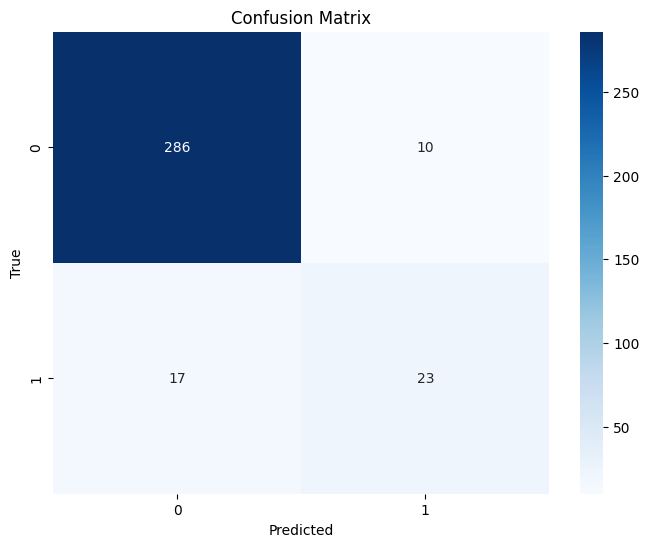

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the train and test accuracy
train_accuracy = history.history['accuracy'][-1]
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(26,)))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization with penalty 0.01
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
74/74 [==============================] - 1s 6ms/step - loss: 1.0270 - accuracy: 0.7337 - val_loss: 0.7894 - val_accuracy: 0.8214
Epoch 2/50
74/74 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.8887 - val_loss: 0.5621 - val_accuracy: 0.8720
Epoch 3/50
74/74 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.9166 - val_loss: 0.4009 - val_accuracy: 0.9018
Epoch 4/50
74/74 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.9204 - val_loss: 0.3597 - val_accuracy: 0.9048
Epoch 5/50
74/74 [==============================] - 0s 4ms/step - loss: 0.2790 - accuracy: 0.9272 - val_loss: 0.3133 - val_accuracy: 0.9196
Epoch 6/50
74/74 [==============================] - 0s 3ms/step - loss: 0.2403 - accuracy: 0.9361 - val_loss: 0.3190 - val_accuracy: 0.9137
Epoch 7/50
74/74 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9420 - val_loss: 0.2990 - val_accuracy: 0.9167
Epoch 8/50
74/74 [==

11/11 [==============================] - 0s 1ms/step
Train Accuracy: 0.9843353033065796
Test Accuracy: 0.9226190447807312
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       296
           1       0.00      0.00      0.00        40

    accuracy                           0.88       336
   macro avg       0.44      0.50      0.47       336
weighted avg       0.78      0.88      0.83       336



c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


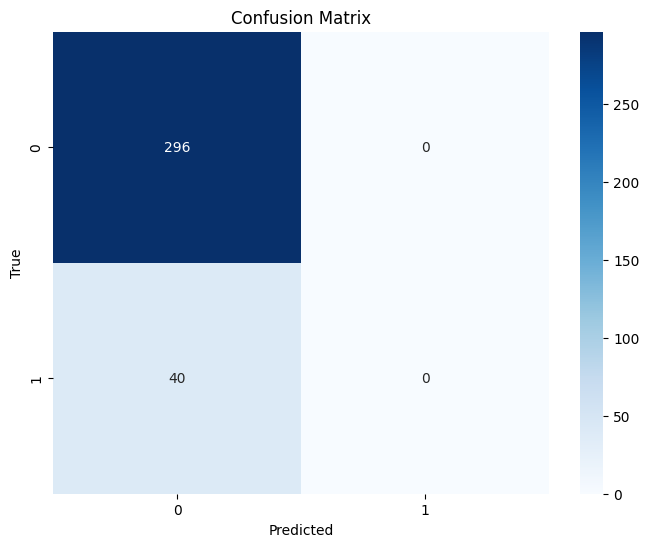

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the train and test accuracy
train_accuracy = history.history['accuracy'][-1]
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

11/11 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.9137
Train Accuracy: 0.993649423122406
Test Accuracy: 0.913690447807312
11/11 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       296
           1       0.64      0.62      0.63        40

    accuracy                           0.91       336
   macro avg       0.80      0.79      0.79       336
weighted avg       0.91      0.91      0.91       336



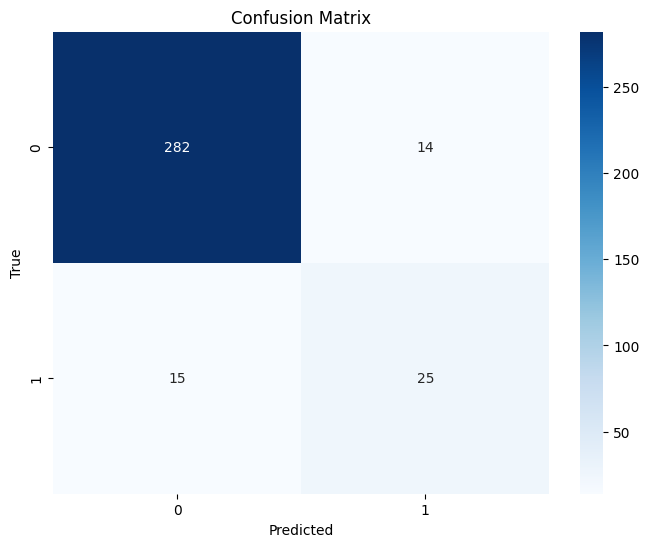

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(26,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
_, train_accuracy = model.evaluate(X_train, y_train)
_, test_accuracy = model.evaluate(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1, 0)

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\asmaa\AppData\Local\Temp\ipykernel_21960\1931147158.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best Parameters:  {'dropout_rate': 0.0, 'weight_decay': 0.0}
Best Score:  0.7286258141199747
Test Loss: 0.3319571614265442
Test Accuracy: 0.8720238208770752
11/11 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       296
           1       0.48      0.80      0.60        40

    accuracy                           0.87       336
   macro avg       0.72      0.84      0.76       336
weighted avg       0.91      0.87      0.89       336



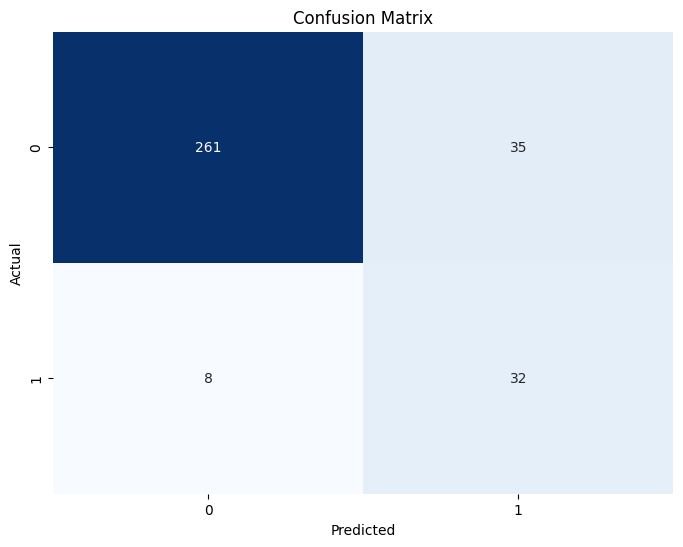

In [21]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the function to create the NN model
def create_model(dropout_rate=0.0, weight_decay=0.0):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'dropout_rate': [0.0, 0.2, 0.4],
    'weight_decay': [0.0, 0.001, 0.01]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_loss, test_acc = best_model.model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/20
60/60 [==============================] - 2s 9ms/step - loss: 0.5073 - accuracy: 0.7792 - val_loss: 0.4371 - val_accuracy: 0.8901
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8793 - val_loss: 0.3536 - val_accuracy: 0.8943
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.9031 - val_loss: 0.3165 - val_accuracy: 0.9027
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.9105 - val_loss: 0.2546 - val_accuracy: 0.9154
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9185 - val_loss: 0.2606 - val_accuracy: 0.9197
Epoch 6/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.9269 - val_loss: 0.2380 - val_accuracy: 0.9281
Epoch 7/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.9301 - val_loss: 0.2114 - val_accuracy: 0.9345
Epoch 8/20
60/60 [==

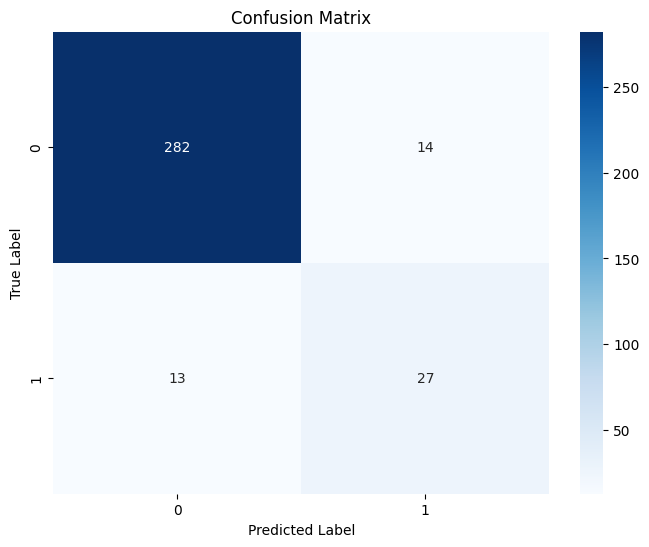

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       296
           1       0.66      0.68      0.67        40

    accuracy                           0.92       336
   macro avg       0.81      0.81      0.81       336
weighted avg       0.92      0.92      0.92       336



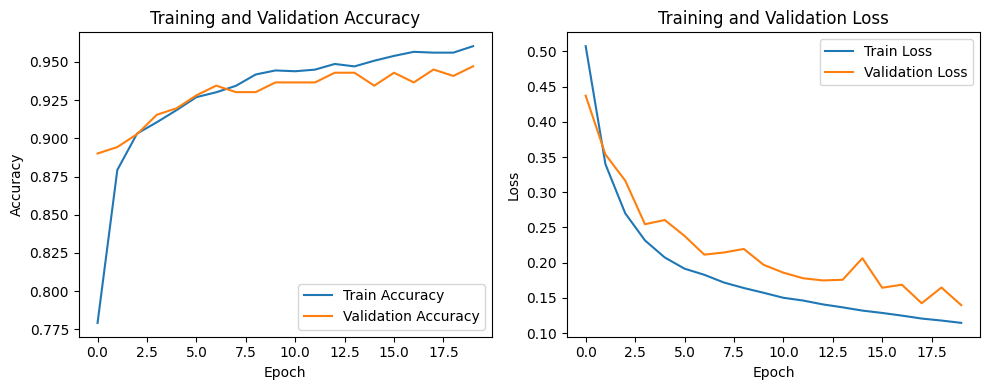

In [22]:
#RNN

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Set the number of timesteps and features
timesteps = 1
features = 26

# Reshape the input data to match the RNN input shape
X_train_rnn = np.reshape(X_train, (X_train.shape[0], timesteps, features))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(timesteps, features)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Reshape the test data
X_test_rnn = np.reshape(X_test, (X_test.shape[0], timesteps, features))

# Predict probabilities on the test data
y_pred_probs = model.predict(X_test_rnn)

# Convert probabilities to binary predictions using a threshold
threshold = 0.5
y_pred_binary = (y_pred_probs > threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

# Get the training and validation accuracy scores
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\asmaa\AppData\Local\Temp\ipykernel_21960\4084261907.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Best Parameters:  {'units': 128}
Best Score:  0.9026400844256083
11/11 [==============================] - 0s 2ms/step


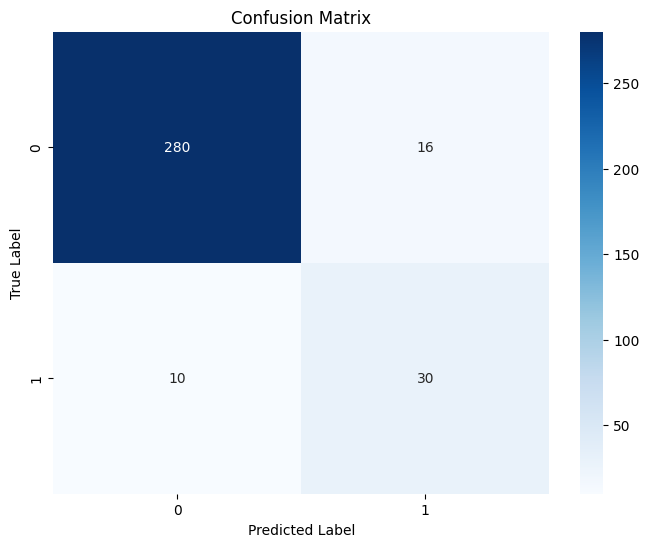

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       296
           1       0.65      0.75      0.70        40

    accuracy                           0.92       336
   macro avg       0.81      0.85      0.83       336
weighted avg       0.93      0.92      0.92       336



In [23]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the function to create the RNN model
def create_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation='relu', input_shape=(timesteps, features)))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {
    'units': [32, 64, 128],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Reshape the input data to match the RNN input shape
X_train_rnn = np.reshape(X_train, (X_train.shape[0], timesteps, features))

# Perform grid search
grid_search.fit(X_train_rnn, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Reshape the test data
X_test_rnn = np.reshape(X_test, (X_test.shape[0], timesteps, features))

# Predict probabilities on the test data
y_pred_probs = best_model.predict(X_test_rnn)

# Convert probabilities to binary predictions using a threshold
threshold = 0.5
y_pred_binary = (y_pred_probs > threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)